In [1]:
import pandas as pd

In [2]:
# file path
global_data = '../output_file/mmr_global.csv'
causes_data = '../output_file/causes_of_deaths_final.csv'

In [3]:
# create df
global_df = pd.read_csv(global_data)
causes_df = pd.read_csv(causes_data)

### Global MMR

In [4]:
global_df.head()

,name,id,mmr,ranking,category,latitude,longitude
0,Belarus,BY,2,1,Very Low (<100),53.7440,27.9470
1,Italy,IT,2,1,Very Low (<100),45.3889,10.7776
2,Norway,NO,2,1,Very Low (<100),60.5366,7.4496
3,Poland,PL,2,1,Very Low (<100),52.1484,19.3110
4,Czech Republic,CZ,3,5,Very Low (<100),49.8360,15.5465


In [5]:
top_10_mmr = global_df.sort_values('mmr', ascending=False).head(10)

top_10_mmr

,name,id,mmr,ranking,category,latitude,longitude
184,South Sudan,SS,1150,185,Extremely High (>1000),7.2928,30.1985
183,Chad,TD,1140,184,Extremely High (>1000),17.1223,19.3602
182,Sierra Leone,SL,1120,183,Extremely High (>1000),8.5306,-11.7953
181,Nigeria,NG,917,182,Very High (500-999),9.6551,8.1061
180,Somalia,SO,829,180,Very High (500-999),2.7589,42.8847
179,Central African Republic,CF,829,180,Very High (500-999),7.2596,21.6691
178,Mauritania,MR,766,179,Very High (500-999),19.1695,-9.4755
177,Guinea-Bissau,GW,667,178,Very High (500-999),12.0227,-15.1106
176,Liberia,LR,661,177,Very High (500-999),6.7929,-9.9769
175,Afghanistan,AF,638,176,Very High (500-999),34.4754,66.8303


In [6]:
bottom_10_mmr = global_df.sort_values('mmr', ascending=True).head(10)

bottom_10_mmr

,name,id,mmr,ranking,category,latitude,longitude
0,Belarus,BY,2,1,Very Low (<100),53.7440,27.9470
1,Italy,IT,2,1,Very Low (<100),45.3889,10.7776
2,Norway,NO,2,1,Very Low (<100),60.5366,7.4496
3,Poland,PL,2,1,Very Low (<100),52.1484,19.3110
4,Czech Republic,CZ,3,5,Very Low (<100),49.8360,15.5465
5,Finland,FI,3,5,Very Low (<100),63.0704,27.7396
6,Greece,GR,3,5,Very Low (<100),38.4414,22.1814
7,Israel,IL,3,5,Very Low (<100),30.6283,34.7087
8,United Arab Emirates,AE,3,5,Very Low (<100),23.3865,54.2485
12,Sweden,SE,4,10,Very Low (<100),58.5810,14.2460


In [46]:
import matplotlib.pyplot as plt
import numpy as np

In [24]:
bottom_10_index = bottom_10_mmr.set_index('name').sort_values('mmr', ascending=True)

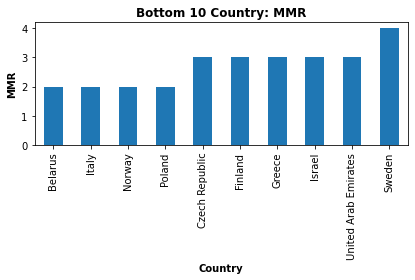

In [25]:
# Generate a bar plot
pd_bar_bottom_10_mmr = bottom_10_index['mmr'].plot(kind='bar', width=0.5)

# Set x/y label, title
pd_bar_bottom_10_mmr.set_title(label='Bottom 10 Country: MMR', fontweight = 'bold')
pd_bar_bottom_10_mmr.set_xlabel('Country', fontweight = 'bold')
pd_bar_bottom_10_mmr.set_ylabel('MMR', fontweight = 'bold')

# Save bar graph to Images folder
plt.tight_layout()
pd_bar_bottom_10_mmr.figure.savefig('../Resources/globalbottomten.png')

# Present the bar chart
plt.show()

# To close pyplot
plt.close()

In [28]:
top_10_index = top_10_mmr.set_index('name').sort_values('mmr', ascending=False)

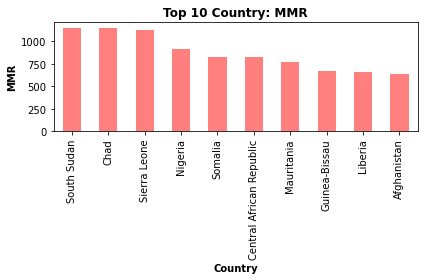

In [29]:
# Generate a bar plot
pd_bar_top_10_mmr = top_10_index['mmr'].plot(kind='bar', color='red', alpha=0.5, width=0.5)

# Set x/y label, title
pd_bar_top_10_mmr.set_title(label='Top 10 Country: MMR', fontweight = 'bold')
pd_bar_top_10_mmr.set_xlabel('Country', fontweight = 'bold')
pd_bar_top_10_mmr.set_ylabel('MMR', fontweight = 'bold')

# Save bar graph to Images folder
plt.tight_layout()
pd_bar_top_10_mmr.figure.savefig('../Resources/globaltopten.png')

# Present the bar chart
plt.show()

# To close pyplot
plt.close()

In [8]:
causes_df.head()

,id,region,abortion,embolism,haemorrhage,hypertension,sepsis,other_direct_causes,indirect_causes
0,1,Worldwide,193000,78000,661000,343000,261000,235000,672000
1,2,Developed regions,1100,2000,2400,1900,690,2900,3600
2,3,Developing regions,192000,76000,659000,341000,260000,232000,668000
3,4,Northern Africa,490,720,8300,3800,1300,3800,4000
4,5,Sub-Saharan Africa,125000,27000,321000,209000,134000,119000,375000


In [60]:
causes_df.columns

Index(['id', 'region', 'abortion', 'embolism', 'haemorrhage', 'hypertension',
       'sepsis', 'other_direct_causes', 'indirect_causes'],
      dtype='object')

In [64]:
# Get overall data
worldwide_df = causes_df.loc[causes_df['region'] == 'Worldwide', ['region', 'abortion', 'embolism', 'haemorrhage', 'hypertension',
       'sepsis', 'other_direct_causes', 'indirect_causes']]
t_worldwide_df = worldwide_df.transpose()

In [65]:
worldwide = t_worldwide_df.iloc[1:]

In [67]:
causes_plot_df = causes_df.iloc[0, :]
causes_plot_df = causes_plot_df[['abortion', 'embolism', 'haemorrhage',
                                'hypertension', 'sepsis', 'other_direct_causes',
                                'indirect_causes']]

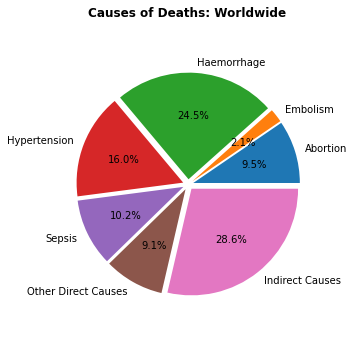

In [142]:
# Generate a pie chart
causes_pie_plot = causes_plot_df.plot.pie(subplots=True, figsize=(5, 5), autopct='%1.1f%%', legend=False, 
                                          labels=['Abortion', 'Embolism', 'Haemorrhage',
                                'Hypertension', 'Sepsis', 'Other Direct Causes',
                                'Indirect Causes'], explode = [0.05 for x in range(0,7)])


# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title('Causes of Deaths: Worldwide', fontweight='bold')
plt.ylabel(None)

# Save bar graph to Images folder
plt.tight_layout()
plt.savefig('../../Images/worldwide_causes.png')

# Present the bar chart
plt.show()

# To close pyplot
plt.close()

In [70]:
# Data to plot
developed = causes_plot_df = causes_df.iloc[1, 2:]
developing = causes_plot_df = causes_df.iloc[2, 2:]
africa_1 = causes_plot_df = causes_df.iloc[3, 2:]
africa_2 = causes_plot_df = causes_df.iloc[4, 2:]

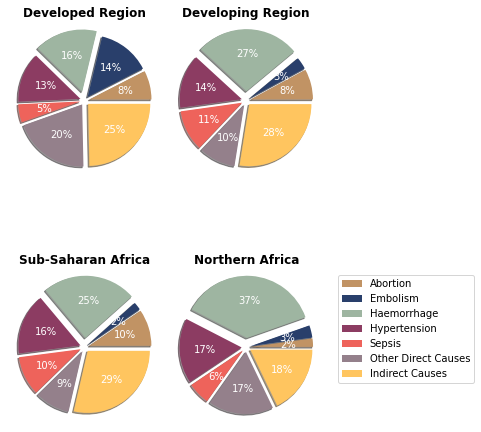

In [216]:
import matplotlib.pyplot as plt

# Parameter
labels = 'Abortion', 'Embolism', 'Haemorrhage', 'Hypertension', 'Sepsis', 'Other Direct Causes', 'Indirect Causes'
explode = [0.075 if i != 2 else 0.15 for i in range(0,7)]
colors = ['#C19364', '#293F6B', '#9EB5A1', '#8C3C62', '#EE635B', '#94808B', '#FFC55F']

# Make figure and axes
fig, axs = plt.subplots(2,2, figsize=(7,7))

# Plot pie charts
axs[0, 0].pie(developed, autopct='%1.0f%%', textprops={'color':"w"}, shadow=True, explode=explode, colors=colors)
axs[0, 1].pie(developing, autopct='%1.0f%%', textprops={'color':"w"}, shadow=True, explode=explode, colors=colors)
axs[1, 1].pie(africa_1, autopct='%1.0f%%', textprops={'color':"w"}, shadow=True, explode=explode, colors=colors)
axs[1, 0].pie(africa_2, autopct='%1.0f%%', textprops={'color':"w"}, shadow=True, explode=explode, colors=colors)

plt.legend(bbox_to_anchor=(2, 1), loc='best', labels=labels)

axs[0, 0].set_title('Developed Region', fontweight='bold')
axs[0, 1].set_title('Developing Region', fontweight='bold')
axs[1, 1].set_title('Northern Africa', fontweight='bold')
axs[1, 0].set_title('Sub-Saharan Africa', fontweight='bold')

# Save bar graph to Images folder
fig.tight_layout()
plt.savefig('../../Images/compared_causes.png')

plt.show()